In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [5]:
class conditionalGraph(TypedDict):
    num1: int
    num2: int
    num3: int
    num4:int
    operation: str
    operation1: str
    final1: int
    final2:int

In [6]:
def add_node(state: conditionalGraph)-> conditionalGraph:
    state['final1'] = state['num1'] + state['num2']
    return state

def add_node1(state: conditionalGraph)-> conditionalGraph:
    state['final2'] = state['num3'] + state['num4']
    return state

def sub_node(state: conditionalGraph)-> conditionalGraph:
    state['final1'] = state['num1'] - state['num2']
    return state

def sub_node1(state: conditionalGraph)-> conditionalGraph:
    state['final2'] = state['num3'] - state['num4']
    return state

def router_decider(state: conditionalGraph)-> conditionalGraph:
    if state['operation'] == '+':
        return "add_operation"
    elif state['operation'] == '-':
        return "sub_operation"

def router1_decider(state: conditionalGraph)-> conditionalGraph:
    if state['operation1'] == '+':
        return "add_operation1"
    elif state['operation1'] == '-':
        return "sub_operation1"

In [8]:
graph = StateGraph(conditionalGraph)

graph.add_node("add_node", add_node)
graph.add_node("add_node1", add_node1)
graph.add_node("sub_node", sub_node)
graph.add_node("sub_node1", sub_node1)
graph.add_node("router", lambda state:state)
graph.add_node("router1", lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges("router", router_decider, {"add_operation": "add_node", "sub_operation": "sub_node"})
graph.add_edge("add_node", "router1")
graph.add_edge("sub_node", "router1")
graph.add_conditional_edges("router1", router1_decider, {"add_operation1": "add_node1", "sub_operation1": "sub_node1"})
graph.add_edge("add_node1", END)    
graph.add_edge("sub_node1", END)

app = graph.compile()


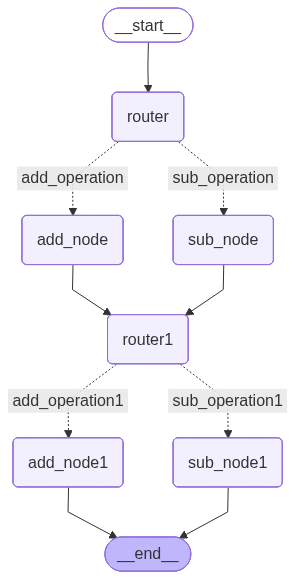

In [9]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
answer = app.invoke({"num1": 10,"operation": "+", "num2": 5, "num3": 7, "operation1": "-", "num4": 2, "final2": 0, "final1": 0})
print(answer)
answer['final1'], answer['final2']

{'num1': 10, 'num2': 5, 'num3': 7, 'num4': 2, 'operation': '+', 'operation1': '-', 'final1': 15, 'final2': 5}


(15, 5)